{(0, 1): '2 / 6', (0, 2): '3 / 3', (0, 3): '4 / 5', (1, 2): '1 / 5', (1, 4): '1 / 3', (2, 4): '2 / 9', (2, 5): '4 / 8', (3, 2): '2 / 2', (3, 4): '2 / 3', (4, 5): '4 / 5'}
[(0, 1), (1, 2), (2, 5), 4]
[(0, 3), (3, 4), (4, 5), 1]
[]
{(0, 1): '6 / 6', (0, 2): '3 / 3', (0, 3): '5 / 5', (1, 2): '5 / 5', (1, 4): '1 / 3', (2, 4): '2 / 9', (2, 5): '8 / 8', (3, 2): '2 / 2', (3, 4): '3 / 3', (4, 5): '5 / 5'}
None
None


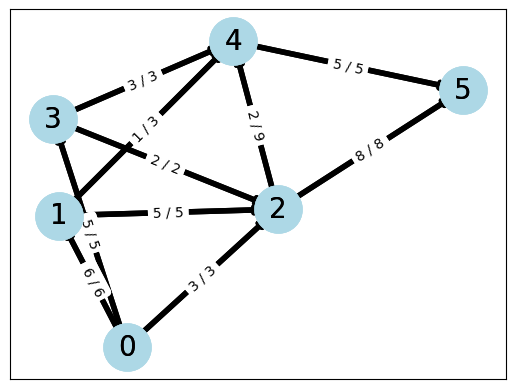

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
class flow:
    def GenerateGraph(self):
        """
        This function generates a static valued graph and return the object of the graph
        Returns:
        Graph object
        """
        try:
            self.G = nx.DiGraph()
            self.G.add_edges_from([(0, 1, {'flow': 2}), (0, 1,{'capacity': 6}),
            (0, 2,{'flow': 3}), (0, 2,{'capacity': 3}),
            (0,3,{'flow': 4}), (0,3,{'capacity': 5}),
            (1,2, {'flow': 1}), (1,2,{'capacity': 5}),
            (1,4, {'flow': 1}), (1,4,{'capacity': 3}),
            (2,4, {'flow': 2}), (2,4,{'capacity': 9}),
            (2,5, {'flow': 4}), (2,5,{'capacity': 8}),
            (3,2, {'flow': 2}), (3,2,{'capacity': 2}),
            (3,4,{'flow': 2}), (3,4,{'capacity': 3}),
            (4,5, {'flow': 4}), (4,5,{'capacity': 5})])
            return self.G
        except Exception as e:
            raise e
    def visualization(self):
        """
        It takes graph object as input and visualize the graph 
        Return 
        None
        """  
        try:
            links = [(u, v) for (u, v, d) in self.G.edges(data=True)]
            pos = nx.nx_pydot.graphviz_layout(self.G)
            nx.draw_networkx_nodes(self.G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
            nx.draw_networkx_edges(self.G, pos, edgelist=links, width=4)                                 # draw edges
            nx.draw_networkx_labels(self.G, pos, font_size=20, font_family="sans-serif")
            edge_labels = {}
            for u, v, data in self.G.edges(data=True):
                label = f"{data['flow']} / {data['capacity']}"
                edge_labels[(u, v)] = label
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=edge_labels, font_size=10)
            print(edge_labels)
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels)
        except Exception as e:
            raise e
    def Paths_From_Source_to_Destination(self,Source,Destination):
        """
        It will give the possible valid paths between source to destination
        Args:
        G:Graph object
        Source:Source node
        Destination:Destination node
        Result
        Returns a list of valid paths between source and destination
        """
        try:
            paths=[]                                  
            for path in nx.all_simple_edge_paths(self.G, source=Source, target=Destination, cutoff=9):
                flag=0     
                for u, v in path:
                    dir=self.G.get_edge_data(u,v)
                    if dir['flow']==dir['capacity']:
                        flag=1
                        break
                if flag==0:
                    paths.append(path)
            return paths
        except Exception as e:
            raise e
    def Heuristic(self,path,G):
        """
        Takes  path between source and destination returns minimmum heuristic value
        Arg:
        paths:Valid path between source and destination
        G:Graph object
        Returns:Returns minimum heuristic value in a paths
        """
        try:
            minimum_heuristic=11
            for i in path:
                u=i[0]
                v=i[1]
                dir=self.G.get_edge_data(u,v)
                capacity=dir['capacity']
                flow=dir['flow']
                minimum_heuristic=min(minimum_heuristic,capacity-flow)
            return minimum_heuristic
        except Exception as e:
            raise e
    def BestHeuristic(self,heuristic_path_values):
        """
        It takes heuristic values of every path as argument and return best path 
        Args:
        Heuristic_Best_Path:It is a dictionary which has path as key and its heuristic value as value
        """            
        try:
            sum=0
            for i in heuristic_path_values:
                len1=len(i)
                sum=sum+i[len1-1]
            best_path=[]
            best_value=0
            best_valve=0
            for i in heuristic_path_values:
                len1=len(i)
                probability=i[len1-1]/sum
                if probability>best_value:
                    best_path=i
                    best_value=probability
            return best_path
        except Exception as e:
            raise e
    
    def Best_Path(self,valid_paths):
        """
        It takes valid paths as argument and return best path
        Args:
        valid_paths:It's a list containing valid paths that connect Source to Destination 
        """              
        try:
            heuristic_path_values=[]
            for path in valid_paths:
                heuristic_value=self.Heuristic(path,self.G)
                list1=path
                path.append(heuristic_value)
                heuristic_path_values.append(path)
            best_path=self.BestHeuristic(heuristic_path_values)
            return best_path
        except Exception as e:
            raise e
    
    def Increase_Flow(self,best_path):
        """
        It takes a best path dictionary as argument and updates the graph by increase the flow of every edge in the best path
        Args:
        best_path:It contain best path and heuristic value as key and value pair
        """    
        try:
            len1=len(best_path)
            value=best_path[len1-1]
            c=best_path.pop(len1-1)
            path=best_path
            for i in path:
                u=i[0]
                v=i[1]
                self.G.get_edge_data(u,v)['flow']=self.G.get_edge_data(u,v)['flow']+value
            return self.G
        except Exception as e:
            raise e
    
    def Successor(self,Source,Destination):
        """
        It takes Source,Destination as arguments and return valid path
        Args:
        Source:It's the starting point of flow
        Destination:It's the ending point point of flow
        """
        try:
            valid_paths=self.Paths_From_Source_to_Destination(Source,Destination)
            return valid_paths
        except Exception as e:
            raise e
        
    def __init__(self):
        self.GenerateGraph()
        self.visualization() 
        heuristic_value=11
        while heuristic_value!=0:
            valid_paths=self.Successor(0,5)
            #print(valid_paths)
            best_path=self.Best_Path(valid_paths)
            print(best_path)
            len1=len(best_path)
            if(len1>0):
                heuristic_value=best_path[len1-1]
                self.Increase_Flow(best_path)
            else:
                heuristic_value=0        
        
        self.visualization()
        print(v)
        print(u)    
        
                
re=flow()            
                                  
                                   


In [5]:
rr={1:23}


In [10]:
re=list(rr.keys())[0]

In [12]:
rr.values()

dict_values([23])

In [24]:
re1={}
list1=[1,2,3,4]
re1[list1]=4

TypeError: unhashable type: 'list'

In [26]:
help(list1.pop)

Help on built-in function pop:

pop(index=-1, /) method of builtins.list instance
    Remove and return item at index (default last).
    
    Raises IndexError if list is empty or index is out of range.



Inflow before modification 9
Inflow after modification 14


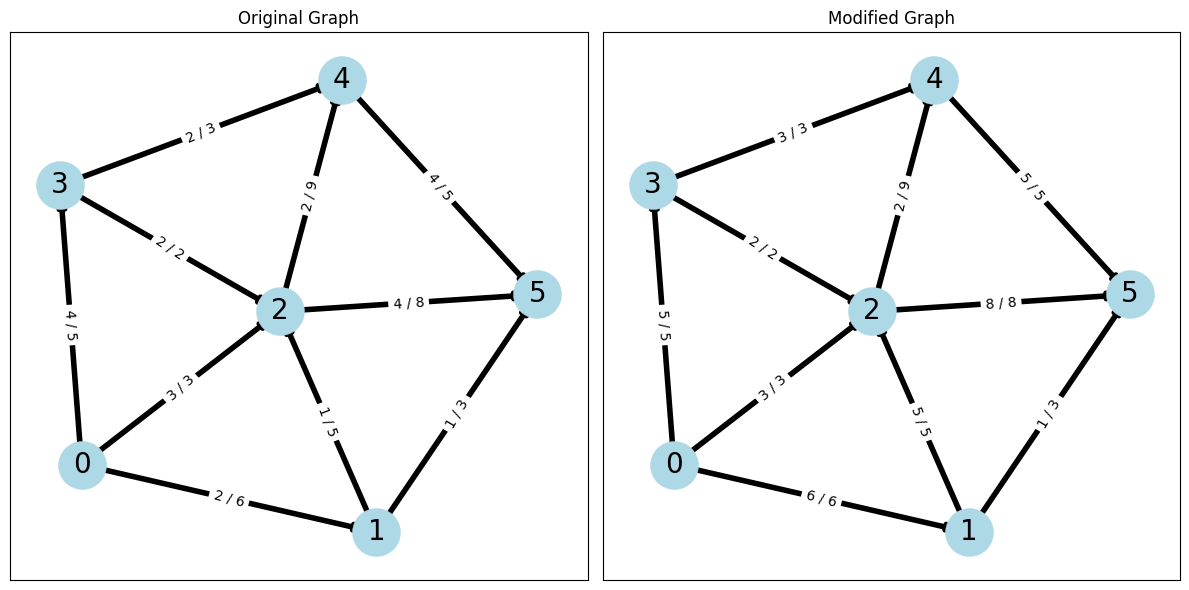

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
class flow:
    def GenerateGraph(self):
        """
        This function generates a static valued graph and return the object of the graph
        Returns:
        Graph object
        """
        try:
            self.G = nx.DiGraph()
            self.G.add_edges_from([(0, 1, {'flow': 2}), (0, 1,{'capacity': 6}),
            (0, 2,{'flow': 3}), (0, 2,{'capacity': 3}),
            (0,3,{'flow': 4}), (0,3,{'capacity': 5}),
            (1,2, {'flow': 1}), (1,2,{'capacity': 5}),
            (1,5, {'flow': 1}), (1,5,{'capacity': 3}),
            (2,4, {'flow': 2}), (2,4,{'capacity': 9}),
            (2,5, {'flow': 4}), (2,5,{'capacity': 8}),
            (3,2, {'flow': 2}), (3,2,{'capacity': 2}),
            (3,4,{'flow': 2}), (3,4,{'capacity': 3}),
            (4,5, {'flow': 4}), (4,5,{'capacity': 5})])
            return self.G
        except Exception as e:
            raise e
    def Paths_From_Source_to_Destination(self,Source,Destination):
        """
        It will give the possible valid paths between source to destination
        Args:
        G:Graph object
        Source:Source node
        Destination:Destination node
        Result
        Returns a list of valid paths between source and destination
        """
        try:
            paths=[]                                  
            for path in nx.all_simple_edge_paths(self.G, source=Source, target=Destination, cutoff=9):
                flag=0     
                for u, v in path:
                    dir=self.G.get_edge_data(u,v)
                    if dir['flow']==dir['capacity']:
                        flag=1
                        break
                if flag==0:
                    paths.append(path)
            return paths
        except Exception as e:
            raise e
    def Heuristic(self,path,G):
        """
        Takes  path between source and destination returns minimmum heuristic value
        Arg:
        paths:Valid path between source and destination
        G:Graph object
        Returns:Returns minimum heuristic value in a paths
        """
        try:
            minimum_heuristic=11
            for i in path:
                u=i[0]
                v=i[1]
                dir=self.G.get_edge_data(u,v)
                capacity=dir['capacity']
                flow=dir['flow']
                minimum_heuristic=min(minimum_heuristic,capacity-flow)
            return minimum_heuristic
        except Exception as e:
            raise e
    def BestHeuristic(self,heuristic_path_values):
        """
        It takes heuristic values of every path as argument and return best path 
        Args:
        Heuristic_Best_Path:It is a dictionary which has path as key and its heuristic value as value
        """            
        try:
            sum=0
            for i in heuristic_path_values:
                len1=len(i)
                sum=sum+i[len1-1]
            best_path=[]
            best_value=0
            best_valve=0
            for i in heuristic_path_values:
                len1=len(i)
                probability=i[len1-1]/sum
                if probability>best_value:
                    best_path=i
                    best_value=probability
            return best_path
        except Exception as e:
            raise e
    
    def Best_Path(self,valid_paths):
        """
        It takes valid paths as argument and return best path
        Args:
        valid_paths:It's a list containing valid paths that connect Source to Destination 
        """              
        try:
            heuristic_path_values=[]
            for path in valid_paths:
                heuristic_value=self.Heuristic(path,self.G)
                list1=path
                path.append(heuristic_value)
                heuristic_path_values.append(path)
            best_path=self.BestHeuristic(heuristic_path_values)
            return best_path
        except Exception as e:
            raise e
    
    def Increase_Flow(self,best_path):
        """
        It takes a best path dictionary as argument and updates the graph by increase the flow of every edge in the best path
        Args:
        best_path:It contain best path and heuristic value as key and value pair
        """    
        try:
            len1=len(best_path)
            value=best_path[len1-1]
            c=best_path.pop(len1-1)
            path=best_path
            for i in path:
                u=i[0]
                v=i[1]
                self.G.get_edge_data(u,v)['flow']=self.G.get_edge_data(u,v)['flow']+value
            return self.G
        except Exception as e:
            raise e
    
    def Successor(self,Source,Destination):
        """
        It takes Source,Destination as arguments and return valid path
        Args:
        Source:It's the starting point of flow
        Destination:It's the ending point point of flow
        """
        try:
            valid_paths=self.Paths_From_Source_to_Destination(Source,Destination)
            return valid_paths
        except Exception as e:
            raise e
    def in_flow(self,edges):
        """
        Takes edges as argument and return inflow of the output
        Args:
            edges:list 
        Returns:
            sum:returns inflow sum
        """
        try:
            sum=0
            for i in edges:
                u=i[0]
                v=i[1]
                sum=sum+self.G.get_edge_data(u,v)['flow']
            return sum
        except Exception as e:
            raise e    
                    
        
    def __init__(self):
        self.GenerateGraph()
        links = [(u, v) for (u, v, d) in self.G.edges(data=True)]
        pos = nx.nx_pydot.graphviz_layout(self.G)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        ax1 = axs[0]
        ax1.set_title("Original Graph")
        nx.draw_networkx_nodes(self.G, pos, ax=ax1, node_size=1200, node_color='lightblue', linewidths=0.25)
        nx.draw_networkx_edges(self.G, pos, edgelist=links, ax=ax1, width=4)
        nx.draw_networkx_labels(self.G, pos, ax=ax1, font_size=20, font_family="sans-serif")
        edges=self.G.in_edges(5)
        sum1=self.in_flow(edges)
        edge_labels = {}
        for u, v, data in self.G.edges(data=True):
            label = f"{data['flow']} / {data['capacity']}"
            edge_labels[(u, v)] = label
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=edge_labels, font_size=10, ax=ax1)
        heuristic_value=11
        while heuristic_value!=0:
            valid_paths=self.Successor(0,5)
            #print(valid_paths)
            best_path=self.Best_Path(valid_paths)
            #print(best_path)
            len1=len(best_path)
            if(len1>0):
                heuristic_value=best_path[len1-1]
                self.Increase_Flow(best_path)
            else:
                heuristic_value=0   
        ax2 = axs[1]
        ax2.set_title("Modified Graph")
        nx.draw_networkx_nodes(self.G, pos, ax=ax2, node_size=1200, node_color='lightblue', linewidths=0.25)
        nx.draw_networkx_edges(self.G, pos, edgelist=links, ax=ax2, width=4)
        nx.draw_networkx_labels(self.G, pos, ax=ax2, font_size=20, font_family="sans-serif")
        edges=self.G.in_edges(5)
        sum2=self.in_flow(edges)
        print("Inflow before modification",sum1)
        print("Inflow after modification",sum2)
        edge_labels1 = {}
        for u, v, data in self.G.edges(data=True):
            label = f"{data['flow']} / {data['capacity']}"
            edge_labels1[(u, v)] = label
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=edge_labels1, font_size=10, ax=ax2)
        plt.tight_layout()
        plt.show()    
        
                
re=flow()